# Vignettes

Model predictions at some interesting locus-- LIN28A on chr1 is a good test candidate.

**Inputs**:
1. Outputs from Py_Vignette script-- normalized insertsions and prediction tsvs at some locus.

In [2]:
library(ggplot2)
library(patchwork)

## Load Input Data

### Configs

In [22]:
cluster_config = read.table("../configs/cluster.tsv", comment.char = '', header=T, sep='\t')
cluster_config$colour = as.character(cluster_config$colour)
cluster_config$description = as.character(cluster_config$description)

# adding for now, though it should be inside
cluster_config[16,] = c(cluster=16, color="#000000", description="iPSC", new_cluster=15)

cluster_config = cluster_config[!is.na(cluster_config$cluster), ]
rownames(cluster_config) = as.factor(cluster_config$cluster)
cluster_config$new_cluster = as.integer(cluster_config$new_cluster)
cluster_config$cluster = as.integer(cluster_config$cluster)
cluster_config

,cluster,colour,description,new_cluster
,<int>,<chr>,<chr>,<int>
1,1,#A6D854,Pre-iPSC,14
2,2,#F0A118,Intermediate,12
3,3,#E85F6D,Fibroblast-like,3
4,4,#006658,Neural-like,8
5,5,#B03743,Fibroblast,1
6,6,#CF175A,Fibroblast-like,4
7,7,#78A824,Pre-iPSC,13
8,8,#F4D5CD,Intermediate,11
9,9,#D4B81C,Intermediate,9


## Preds/Insertions

In [11]:
model_preds = read.table("./vignette_intermediate//LIN28A.prom.pred.unsmoothed.tsv", 
                         sep='\t',
                        header=T)
rownames(model_preds) = model_preds$cluster_idx
model_preds$cluster_idx = NULL
model_preds

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X1991,X1992,X1993,X1994,X1995,X1996,X1997,X1998,X1999,X2000
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,0.02369279,0.03619899,0.01751364,0.002609449,0.001269025,0.001963376,0.007694446,0.01556466,0.01177844,0.004411332,⋯,0.002278212,0.007229614,0.01557264,0.01132920,0.004634893,0.002855671,0.004247988,0.007261981,0.004987209,0.005344995
4,0.03669079,0.04996238,0.02033393,0.004673344,0.004040699,0.006280138,0.016092446,0.02533276,0.01764132,0.009580296,⋯,0.003628912,0.007775515,0.01711479,0.01447949,0.006632262,0.004291590,0.005761912,0.009405852,0.007621029,0.004910952
8,0.04437888,0.05029957,0.02577964,0.007759033,0.003944067,0.006228853,0.020884957,0.03364590,0.02081219,0.012873035,⋯,0.003416999,0.012744239,0.02815014,0.02188153,0.008879400,0.004593850,0.004915357,0.008384493,0.006265230,0.005564594
2,0.06053949,0.08980001,0.05133953,0.007198665,0.004241720,0.009192721,0.032069903,0.04968164,0.03032266,0.015680594,⋯,0.004103358,0.017808681,0.03462178,0.02361451,0.010451067,0.005768525,0.006035799,0.009458065,0.009531535,0.009495697
7,0.10318799,0.14598012,0.07669684,0.017418586,0.011167836,0.015733020,0.046952024,0.07879740,0.05454103,0.028487815,⋯,0.004368069,0.015406425,0.02664376,0.02047420,0.011738924,0.004964893,0.005856242,0.011928062,0.009585627,0.008366788
1,0.12242170,0.21026528,0.10786309,0.026455610,0.015265726,0.019533560,0.058589812,0.09076948,0.04614864,0.029410953,⋯,0.009871842,0.040575730,0.07575095,0.05516031,0.028777113,0.013853826,0.029139217,0.041108754,0.022772409,0.024636420
16,0.14801821,0.23040625,0.11933910,0.020590657,0.010351164,0.021364432,0.075021130,0.13749003,0.10073962,0.054246463,⋯,0.010667897,0.031745900,0.06183843,0.04729349,0.023239668,0.011782819,0.019783609,0.031351585,0.022917060,0.019103453


In [10]:
insertions = read.table("./vignette_intermediate//LIN28A.prom.insertions.unsmoothed.tsv", 
                         sep='\t',
                        header=T)
rownames(insertions) = insertions$cluster_idx
insertions$cluster_idx = NULL
insertions

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X1991,X1992,X1993,X1994,X1995,X1996,X1997,X1998,X1999,X2000
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,0.01923077,0.01923077,0.00000000,0.00000000,0,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000,⋯,0.00000000,0.00000000,0.00000000,0.00000000,0,0,0.00000000,0.0000000,0.00000000,0.00000000
4,0.00000000,0.00000000,0.00000000,0.00000000,0,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000,⋯,0.00000000,0.00000000,0.00000000,0.00000000,0,0,0.00000000,0.0000000,0.00000000,0.00000000
8,0.00000000,0.07692308,0.00000000,0.00000000,0,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000,⋯,0.00000000,0.00000000,0.00000000,0.00000000,0,0,0.00000000,0.0000000,0.00000000,0.00000000
2,0.07692308,0.07692308,0.03846154,0.00000000,0,0.00000000,0.0000000,0.07692308,0.00000000,0.03846154,⋯,0.07692308,0.00000000,0.03846154,0.00000000,0,0,0.00000000,0.0000000,0.00000000,0.00000000
7,0.33333333,0.00000000,0.00000000,0.00000000,0,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000,⋯,0.00000000,0.00000000,0.00000000,0.00000000,0,0,0.00000000,0.0000000,0.00000000,0.00000000
1,0.07692308,0.38461538,0.00000000,0.00000000,0,0.00000000,0.2307692,0.00000000,0.00000000,0.00000000,⋯,0.00000000,0.00000000,0.00000000,0.00000000,0,0,0.00000000,0.0000000,0.00000000,0.00000000
16,0.31250000,0.22916667,0.02083333,0.02083333,0,0.04166667,0.1041667,0.12500000,0.02083333,0.00000000,⋯,0.00000000,0.04166667,0.06250000,0.04166667,0,0,0.04166667,0.1041667,0.02083333,0.08333333


In [16]:
CLUSTERS = rownames(insertions)
CLUSTERS
all(CLUSTERS %in% rownames(model_preds))

[1] "5"  "4"  "8"  "2"  "7"  "1"  "16"

[1] TRUE

## Plotting

In [140]:
plot_mat <- function(obs_mat, pred_mat, title=F) {
    plots = list()
    
    i=1
    for (x in CLUSTERS[order(cluster_config[CLUSTERS,"new_cluster"])]) {
        plots[[i]] = ggplot(data.frame(x=seq(ncol(obs_mat)),
                                       y=unlist(obs_mat[x, ]))) +
                    geom_line(aes(x=x,y=y), size=.3, col=cluster_config[x, "colour"]) +
                    ylim(0,1) + 
                    theme_void(base_size=18) +
                    annotate('text', x=1900, y=0.9, label="Obs", size=6) +
                    theme(plot.title = element_text(hjust = 0.05))
        
        plots[[i]] = plots[[i]] + 
                            ggtitle(paste(cluster_config[x, "new_cluster"],
                              cluster_config[x, "description"],
                             sep=" - ")) 
        
        plots[[i+1]] = ggplot(data.frame(x=seq(ncol(pred_mat)),
                                       y=unlist(pred_mat[x, ]))) +
                    geom_line(aes(x=x,y=y), size=.3, col=cluster_config[x, "colour"]) +
                    ylim(0,1) + 
                    theme_void() +
                    annotate('text', x=1900, y=0.9, label="Pred", size=6) +
                    theme(plot.title = element_text(hjust = 0.05))
        
        plots[[i+1]] = plots[[i+1]] + 
                            ggtitle(" ") 

#         else {
#             # need this to keep alignment
#             plots[[i]] = plots[[i]] + ggtitle(" ")
#         }
        
        i = i + 2
    }
    
    plots
}


In [149]:
top_plot = ggplot() + annotate("text", x=5, y=1, label="LIN28A Promoter (chr1:26409794-26411794)", size=8) +
#             annotate("text", x=7.5, y=1, label="Predicted", size=TXTSZ) +
            xlim(c(0,10)) + 
            theme_void()

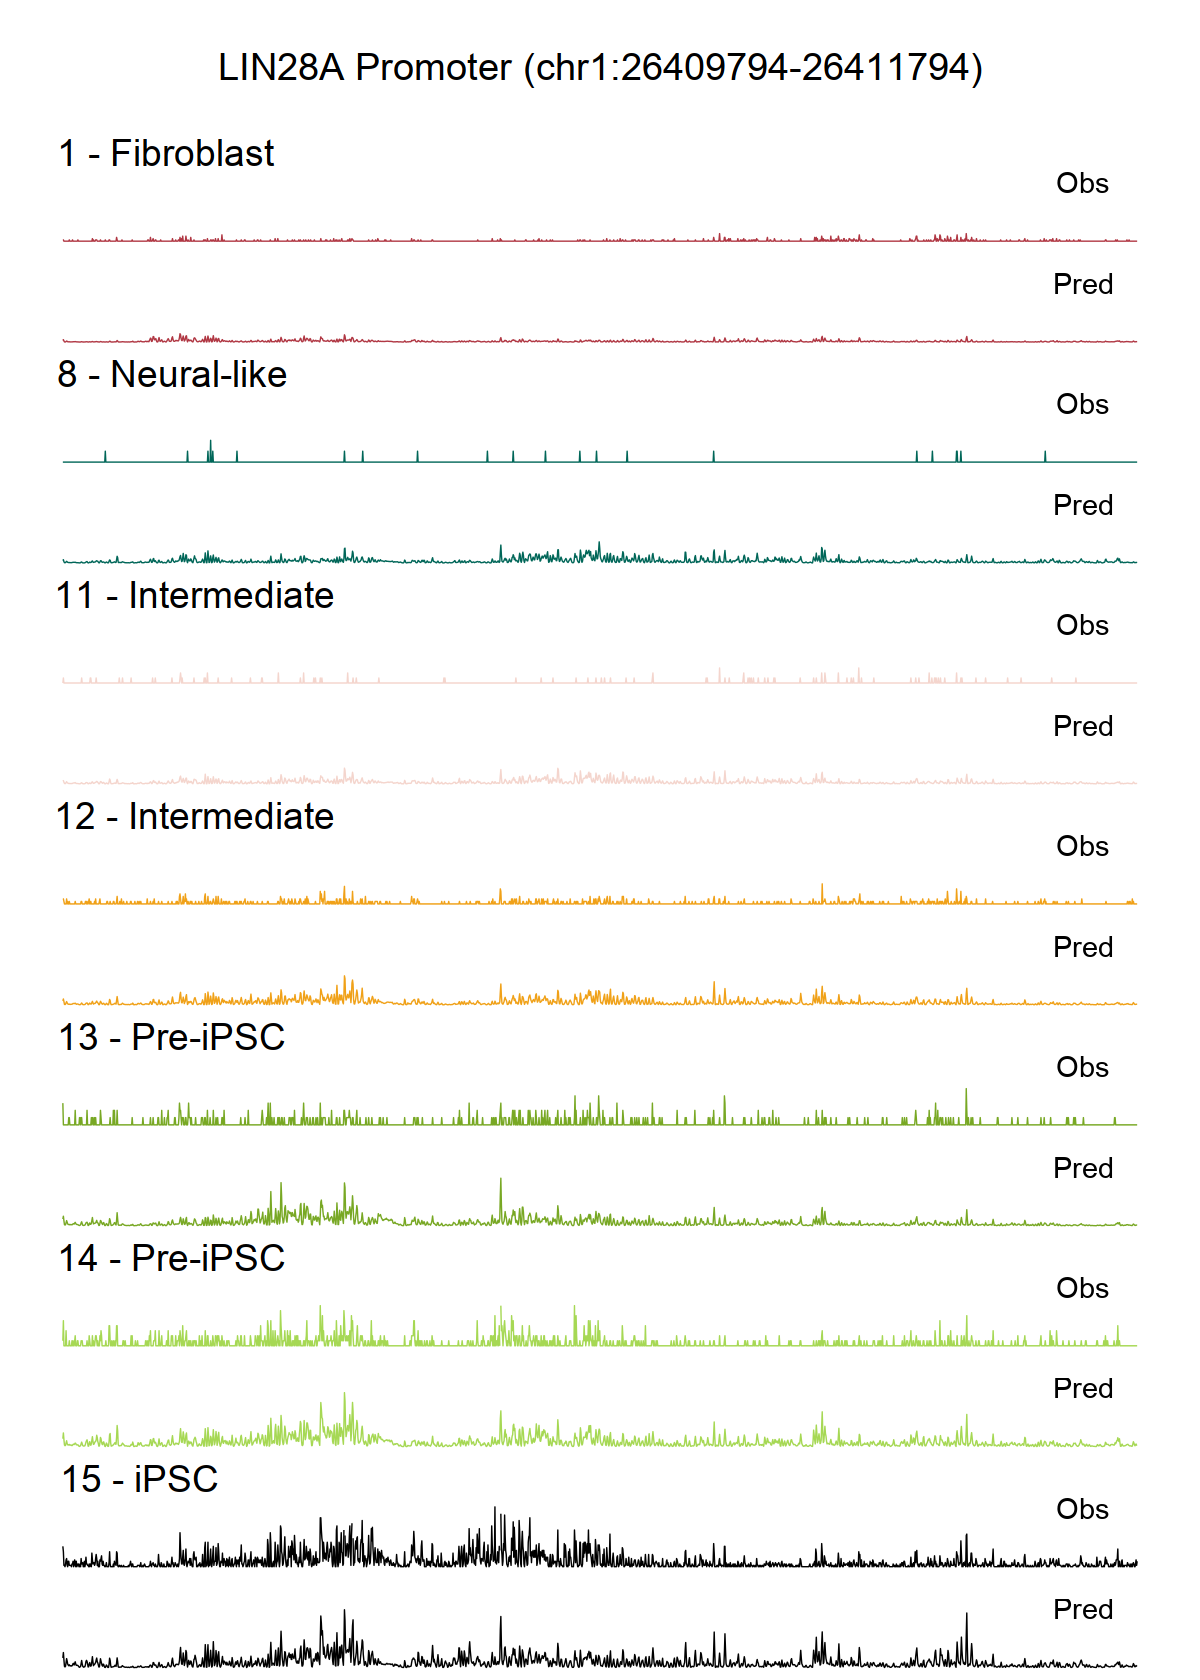

In [150]:
options(repr.plot.width = 10, repr.plot.height = 14)
 
wrap_plots(top_plot,
    wrap_plots(plot_mat(insertions, model_preds), ncol=1),
           heights=c(1,13))

## ZEB Negative Importance Vignette

CDH1 predictions with importance scores.

In [ ]:
library(ggseqlogo)
library(BSgenome.Hsapiens.UCSC.hg38)
hg38 = BSgenome.Hsapiens.UCSC.hg38

In [152]:
model_preds = read.table("./vignette_intermediate/CDH1.prom.chr16.68737277.pred.unsmoothed.tsv", 
                         sep='\t',
                        header=T)
rownames(model_preds) = model_preds$cluster_idx
model_preds$cluster_idx = NULL
model_preds

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X1991,X1992,X1993,X1994,X1995,X1996,X1997,X1998,X1999,X2000
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,1.769528e-05,1.911034e-05,8.602218e-06,3.032039e-06,2.322341e-06,1.284925e-06,1.289973e-06,1.877412e-06,1.477954e-06,2.285223e-06,⋯,0.009591834,0.02142316,0.01301660,0.001926992,0.004814264,0.01211255,0.01644009,0.01173791,0.008632475,0.01639572
4,4.547833e-05,2.876449e-05,1.020544e-05,5.675245e-06,3.864058e-06,3.104047e-06,2.720785e-06,3.831875e-06,4.072751e-06,5.132347e-06,⋯,0.045995710,0.08906651,0.04931810,0.019289337,0.018436898,0.05293003,0.05925023,0.03090578,0.026405960,0.07363994
8,5.412531e-05,4.351966e-05,1.332631e-05,7.076003e-06,5.278895e-06,5.324637e-06,5.103093e-06,4.913480e-06,6.748674e-06,8.967634e-06,⋯,0.020683454,0.03513505,0.01787462,0.004232278,0.008164826,0.02037428,0.01764374,0.01380193,0.013545693,0.02193987
2,6.263701e-05,3.252827e-05,7.044152e-06,4.171842e-06,2.732983e-06,4.193757e-06,4.390697e-06,4.774391e-06,5.390034e-06,6.290240e-06,⋯,0.018561390,0.03744601,0.01898189,0.003178048,0.005377443,0.01592772,0.02379968,0.01790214,0.014179678,0.03436940
7,5.853415e-05,5.493832e-05,3.141955e-05,1.506227e-05,1.009273e-05,7.058369e-06,7.035354e-06,6.731395e-06,7.380417e-06,9.519083e-06,⋯,0.018273557,0.03461071,0.01945249,0.006431393,0.012648577,0.03239163,0.02746652,0.01540078,0.016023751,0.03141981
1,1.177268e-04,9.575961e-05,5.325537e-05,2.152725e-05,1.403874e-05,1.028677e-05,1.405153e-05,2.035716e-05,2.291686e-05,2.890852e-05,⋯,0.079651270,0.12982509,0.05903378,0.015594076,0.041217297,0.10756537,0.12674274,0.07708147,0.060026420,0.11741378
16,1.046060e-04,8.448452e-05,2.562434e-05,9.823784e-06,7.928631e-06,8.761510e-06,1.056055e-05,1.628465e-05,1.352692e-05,1.147870e-05,⋯,0.046695130,0.08839623,0.05035647,0.008376049,0.017121198,0.04033035,0.04741374,0.02930317,0.033299850,0.05405295


In [153]:
insertions = read.table("./vignette_intermediate/CDH1.prom.chr16.68737277.insertions.unsmoothed.tsv", 
                         sep='\t',
                        header=T)
rownames(insertions) = insertions$cluster_idx
insertions$cluster_idx = NULL
insertions

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X1991,X1992,X1993,X1994,X1995,X1996,X1997,X1998,X1999,X2000
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,0,0,0,0,0,0,0,0,0,0,⋯,0.01923077,0.00000000,0,0,0.00000000,0.0000,0.00000000,0.00000000,0.00000000,0.0000000
4,0,0,0,0,0,0,0,0,0,0,⋯,0.00000000,0.00000000,0,0,0.00000000,0.0000,0.00000000,0.00000000,0.00000000,0.0000000
8,0,0,0,0,0,0,0,0,0,0,⋯,0.00000000,0.00000000,0,0,0.00000000,0.0000,0.00000000,0.00000000,0.00000000,0.0000000
2,0,0,0,0,0,0,0,0,0,0,⋯,0.03846154,0.03846154,0,0,0.00000000,0.0000,0.03846154,0.00000000,0.00000000,0.0000000
7,0,0,0,0,0,0,0,0,0,0,⋯,0.00000000,0.00000000,0,0,0.00000000,0.0000,0.00000000,0.11111111,0.00000000,0.0000000
1,0,0,0,0,0,0,0,0,0,0,⋯,0.00000000,0.07692308,0,0,0.07692308,0.0000,0.00000000,0.00000000,0.07692308,0.1538462
16,0,0,0,0,0,0,0,0,0,0,⋯,0.06250000,0.14583333,0,0,0.02083333,0.0625,0.02083333,0.04166667,0.10416667,0.1041667


In [254]:
importance = read.table("./vignette_intermediate/CDH1.prom.chr16.68737277.counts.explain.tsv", 
                         sep='\t',
                        header=T)
rownames(importance) = importance$cluster_idx
importance$cluster_idx = NULL
importance

,lower_lim,upper_lim,X1,X2,X3,X4,X5,X6,X7,X8,⋯,X1991,X1992,X1993,X1994,X1995,X1996,X1997,X1998,X1999,X2000
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,-0.09528090,0.10856805,0.0010211686,0.0015589825,0.0001822526,-0.0003660385,0.0005379565,0.0010900283,0.0007535172,0.0008383856,⋯,-0.0048566093,-0.0035765418,-0.0020751987,0.0018170865,-0.0031810173,-0.0022570330,-0.0013705200,-0.004467386,-0.003431538,-0.0016586088
4,-0.06740090,0.08307202,0.0015165022,0.0007618326,0.0010576438,0.0012446222,0.0011440493,0.0008863084,0.0005199528,0.0014535048,⋯,0.0009637036,-0.0004395343,0.0002912971,0.0012548841,0.0001052585,-0.0007924630,-0.0009323681,-0.002658216,-0.003135275,-0.0008505300
8,-0.04677160,0.08304660,0.0018602600,0.0022971542,0.0015467752,0.0019444179,0.0018795834,0.0018490653,0.0016653627,0.0012790974,⋯,0.0001167105,-0.0010823585,0.0004318192,0.0022439377,0.0006367234,0.0000738688,0.0002214058,-0.001669516,-0.001068800,-0.0001698402
2,-0.04949269,0.07416928,0.0008150660,0.0015541969,0.0002427276,0.0005081806,0.0004895635,0.0014426569,0.0007212192,0.0006111994,⋯,0.0005144634,0.0004085174,-0.0005041271,0.0001280013,-0.0002493449,0.0005743361,-0.0001705655,-0.001922857,-0.001183012,0.0001022160
7,-0.05892770,0.08340034,0.0008727599,0.0012467829,-0.0007311629,-0.0002070055,-0.0001038891,0.0005155135,0.0004012920,0.0004460413,⋯,-0.0001411833,0.0022960815,-0.0005919970,0.0008691461,0.0025672534,-0.0019711363,-0.0024913516,-0.003645642,-0.003055099,-0.0009771683
1,-0.04564816,0.06923627,0.0013839076,0.0016903124,0.0007841596,0.0006687096,0.0009125110,0.0018796502,0.0016257509,0.0013567742,⋯,-0.0007290751,-0.0010496760,-0.0015243259,-0.0009404989,-0.0013112009,-0.0011977793,-0.0028794911,-0.002898008,-0.002146329,-0.0007844669
16,-0.04893407,0.08119055,0.0009460478,0.0016995586,0.0010394039,0.0004576457,0.0018489951,0.0012476286,0.0010719585,0.0009289935,⋯,-0.0007101873,0.0006130838,-0.0014833782,-0.0000290190,-0.0001873556,-0.0018833834,-0.0022694839,-0.004721758,-0.004821109,-0.0011681800


In [156]:
CLUSTERS = rownames(insertions)
CLUSTERS
all(CLUSTERS %in% rownames(model_preds))

[1] "5"  "4"  "8"  "2"  "7"  "1"  "16"

[1] TRUE

In [308]:
# many bigwigs, one peak
importance_to_matrix <- function(clusters, imp_scores, peak) {
    # get DNA sequence
    sequence = hg38[[as.vector(seqnames(peak))]][(start(peak)+1):(end(peak))]
    
    scores = list()
    
    for (i in clusters) {
        m = matrix(0, length(sequence), 4)
        colnames(m) = c("A", "C", "G", "T")
        m[cbind(seq(length(sequence)), as.vector(matrix(sequence)))] = unlist(imp_scores[i, 3:ncol(imp_scores)])
        
        scores[[i]] = t(m)
    }
    
    scores
}

In [309]:
plot_seq <- function(m, ymin, ymax, clip=F, cutrange=NULL) {
    mat = m
    
#     rownames(mat) = c("A", "C", "G", "T")
    
    # cap to upper and lower limits
    if (clip==T) {
        mat[mat>ymax] = ymax
        mat[mat<ymin] = ymin
    }
    
    
    if (length(cutrange) == 0) {
        p = ggseqlogo(mat, method='custom', seq_type='dna') 
    }
    
    else {
        p = ggseqlogo(mat[,cutrange], method='custom', seq_type='dna') 
    }
    
    p = p + theme_void() + coord_cartesian(ylim=c(ymin, ymax))
    
    p
}

In [310]:
# center coordinate in file name +-1000
REGION = GRanges("chr16:68736277-68738277")

In [311]:
imp_matrices = importance_to_matrix(CLUSTERS, importance, REGION)

In [396]:
plot_mat_with_importance <- function(obs_mat, pred_mat, imp_mat, imp_scores, slice_min, slice_max,
                                     cluster_subset, linewidth=1, title=F) {
    plots = list()

    obs_mat = obs_mat[,slice_min:slice_max]
    pred_mat = pred_mat[,slice_min:slice_max]
    
    for (x in cluster_subset) {
        imp_mat[[x]] = imp_mat[[x]][,slice_min:slice_max]
    }
    
    i=1
    for (x in cluster_subset[order(cluster_config[cluster_subset,"new_cluster"])]) {
        plots[[i]] = ggplot(data.frame(x=seq(ncol(obs_mat)),
                                       y=unlist(obs_mat[x, ]))) +
                    geom_line(aes(x=x,y=y), size=linewidth-0.5, col=cluster_config[x, "colour"]) +
                    ylim(0,1) + 
                    theme_void(base_size=18) +
                    annotate('text', x=slice_max-slice_min+10, y=0.5, label="Obs", size=6) +                    
                    theme(plot.title = element_text(hjust = 0.05)) +
                    annotate("segment", x=0, xend=slice_max-slice_min, 
                             y=0, yend=0, col='gray', size=0.3, alpha=0.3)
        
        plots[[i]] = plots[[i]] + 
                            ggtitle(paste(cluster_config[x, "new_cluster"],
                              cluster_config[x, "description"],
                             sep=" - ")) 
        
        plots[[i+1]] = ggplot(data.frame(x=seq(ncol(pred_mat)),
                                       y=unlist(pred_mat[x, ]))) +
                    geom_line(aes(x=x,y=y), size=linewidth, col=cluster_config[x, "colour"]) +
                    ylim(0,1) + 
                    theme_void() +
                    annotate('text', x=slice_max-slice_min+10, y=0.5, label="Pred", size=6) +
                    theme(plot.title = element_text(hjust = 0.05)) +
                    annotate("segment", x=0, xend=slice_max-slice_min, 
                             y=0, yend=0, col='gray', size=0.3, alpha=0.3)
        
        plots[[i+1]] = plots[[i+1]] + 
                            ggtitle(" ") 
    
        # importance
        plots[[i+2]] = plot_seq(imp_mat[[x]], 
                               ymin=imp_scores[x, "lower_lim"],
                               ymax=imp_scores[x, "upper_lim"],
                               clip=T) +
                    annotate('text', x=slice_max-slice_min+10, y=imp_scores[x, "upper_lim"]-0.02, 
                             label="Imp", size=6)
        
        plots[[i+2]] = plots[[i+2]] + 
                            ggtitle(" ") 
        
        i = i + 3
    }
    
    plots
}


In [411]:
SLICE_BEGIN = 868
SLICE_END = 998

In [412]:
top_plot = ggplot() + annotate("text", x=5, y=1, label=sprintf("CDH1 Promoter (%s:%d-%d)", 
                                                              as.vector(seqnames(REGION)),
                                                              start(REGION)+SLICE_BEGIN,
                                                              start(REGION)+SLICE_END), size=8) +
#             annotate("text", x=7.5, y=1, label="Predicted", size=TXTSZ) +
            xlim(c(0,10)) + 
            theme_void()

Coordinate system already present. Adding new coordinate system, which will replace the existing one.

Coordinate system already present. Adding new coordinate system, which will replace the existing one.

Coordinate system already present. Adding new coordinate system, which will replace the existing one.

Coordinate system already present. Adding new coordinate system, which will replace the existing one.



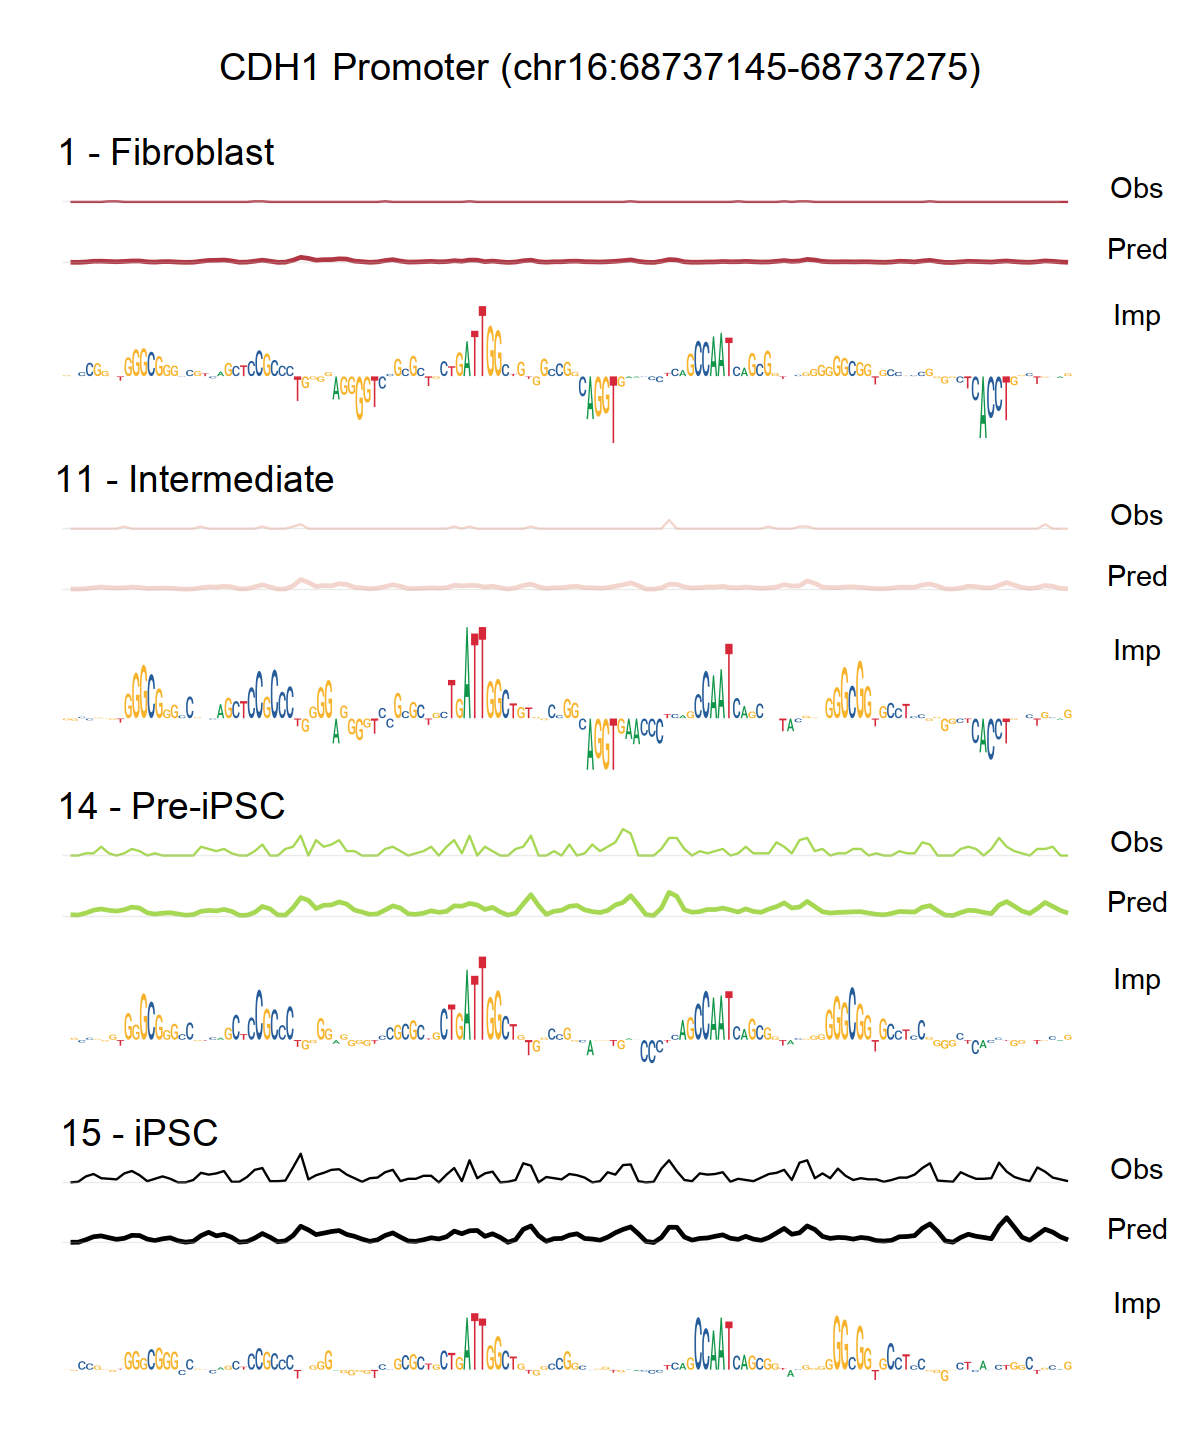

In [417]:
options(repr.plot.width = 10, repr.plot.height = 12)

CLUSTER_SUBSET = c("5","8","1","16")

wrap_plots(top_plot,
    wrap_plots(plot_mat_with_importance(insertions, model_preds, imp_matrices, 
                                        importance, SLICE_BEGIN, SLICE_END,
                                       cluster_subset=CLUSTER_SUBSET), 
               ncol=1,
              heights=rep(c(1,1,5), length(CLUSTER_SUBSET))),
           heights=c(1,11))